In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from pathlib import Path
import shutil
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
root_path = os.path.dirname(os.getcwd())
data_path = os.path.join(root_path, "data/multi_classed_grouped_data")
products = os.listdir(data_path)
number_of_product = len(products)
number_of_product

15

(900, 900, 3)


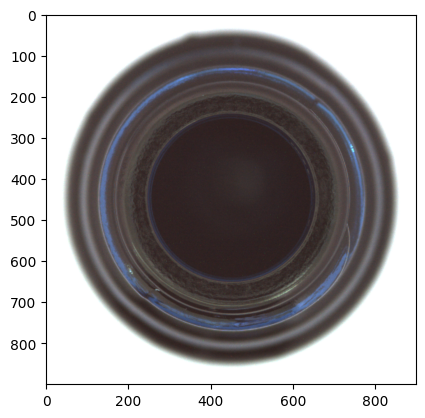

In [3]:
sample_image = cv2.imread(data_path + "/bottle/train/000.png", cv2.IMREAD_UNCHANGED)
print(sample_image.shape)
plt.imshow(sample_image)

### Generate golden image by image averaging of the "good" products

bottle
Number of images: 229
cable
Number of images: 282
capsule
Number of images: 242
carpet
Number of images: 308
grid
Number of images: 285
hazelnut
Number of images: 431
leather
Number of images: 277
metal_nut
Number of images: 242
pill
Number of images: 293
screw
Number of images: 361
tile
Number of images: 263
toothbrush
Number of images: 72
transistor
Number of images: 273
wood
Number of images: 266
zipper
Number of images: 272


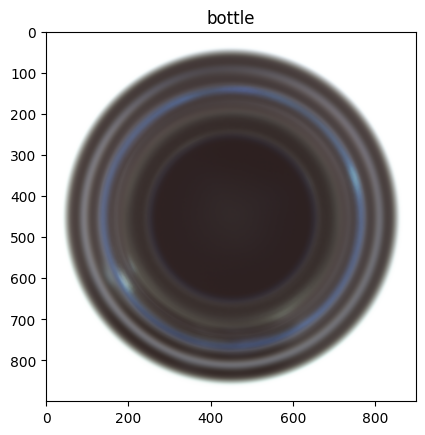

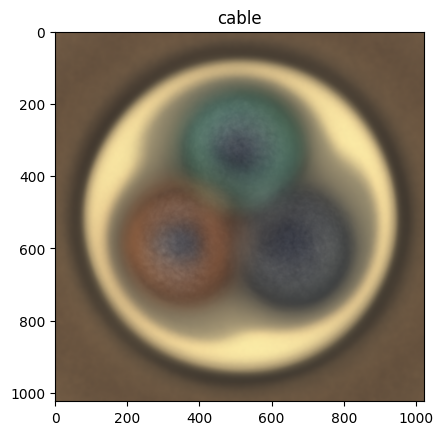

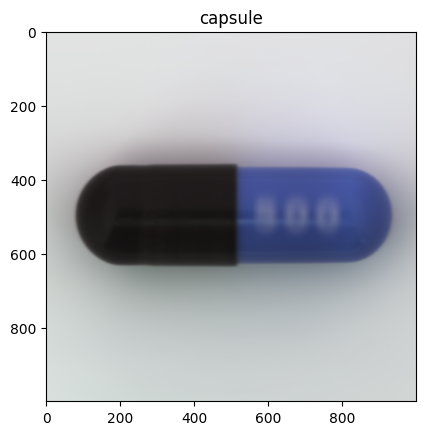

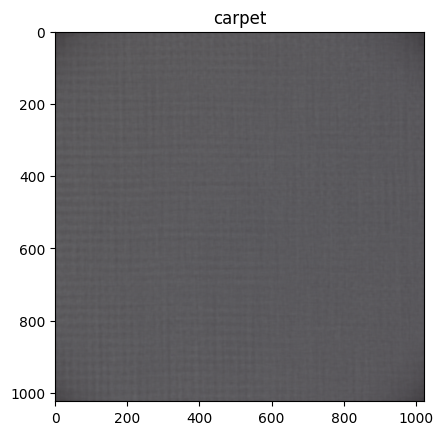

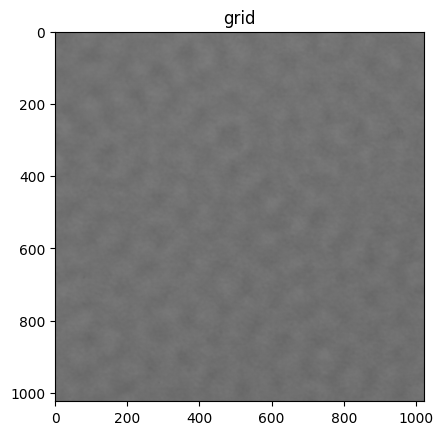

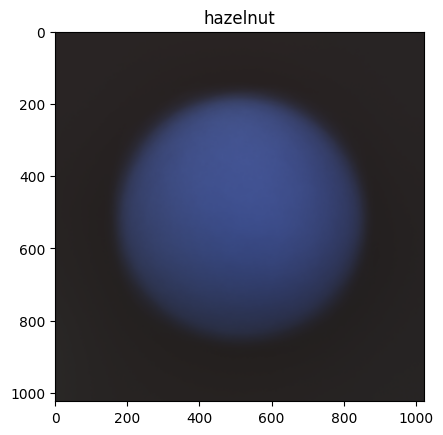

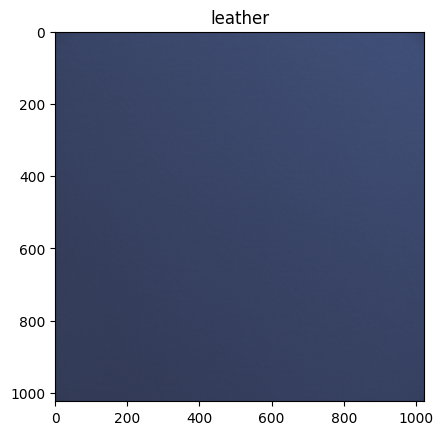

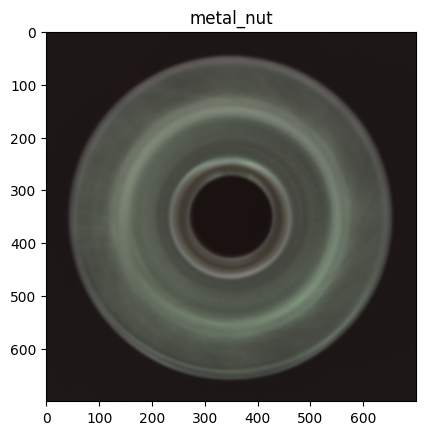

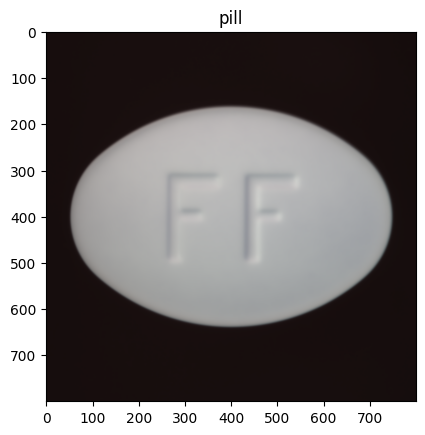

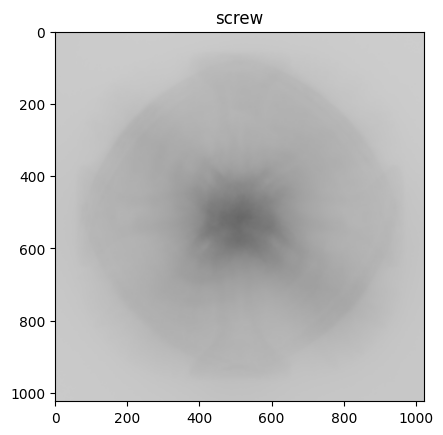

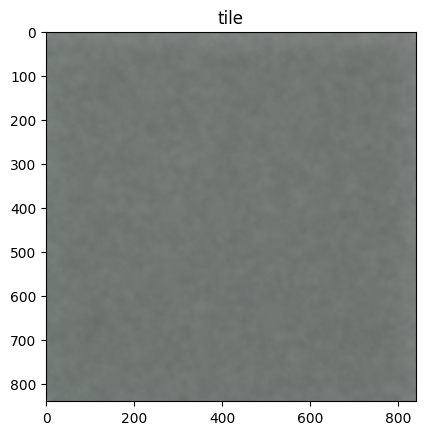

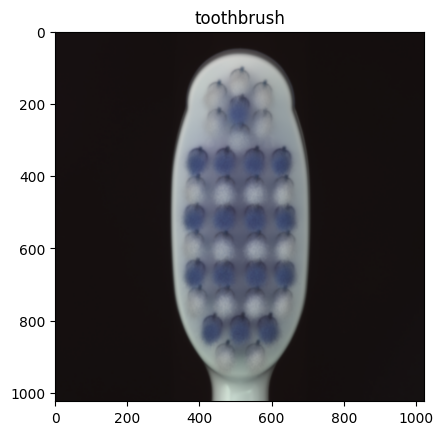

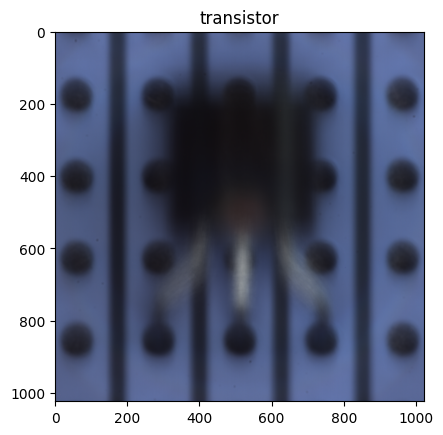

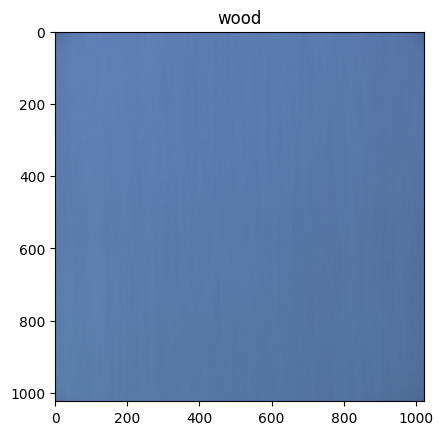

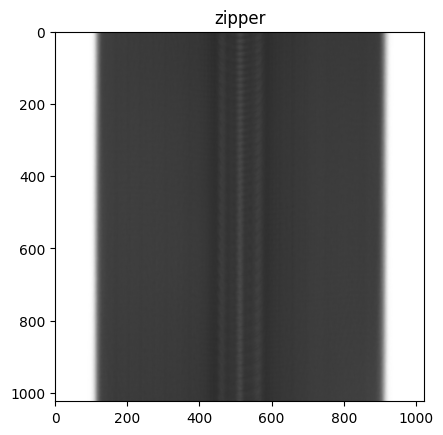

In [4]:
dest_path = os.path.join(root_path, "data/golden_images")
if not os.path.exists(dest_path):
    os.mkdir(dest_path)

for product in products:
    print(product)
    product_path = os.path.join(data_path, product)
    dest_product_path = os.path.join(dest_path, product)
    if not os.path.exists(dest_product_path):
        os.mkdir(dest_product_path)
    good_images_path = os.path.join(product_path, 'train')
    
    image_name_list = os.listdir(good_images_path)
    n = len(image_name_list)
    print('Number of images:', n)

    first_image = cv2.imread(os.path.join(good_images_path, image_name_list[0]), cv2.IMREAD_COLOR)
    golden_image = first_image/n
    # Image averaging:
    for image_name in image_name_list[1:]:
        image = cv2.imread(os.path.join(good_images_path, image_name), cv2.IMREAD_COLOR)
        golden_image += image/n

    golden_image = np.array(np.round(golden_image), np.uint8)
    
    plt.figure()
    plt.imshow(golden_image)
    plt.title(product)

    cv2.imwrite(os.path.join(dest_product_path, product + '.png'), golden_image)